# Choose Calibration Method for XGBoost - Isotonic or Logistic

In [ ]:
xg = xgb.XGBClassifier(eta = 0.15,max_depth = 6,min_child_weight=4,gamma=1.6,colsample_bytree=0.9,subsample=0.6,reg_alpha=0.2,reg_lambda=1)
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_cali,y_train_cali = oversampler.fit_resample(X_train,y_train)

xg_calibration = CalibratedClassifierCV(xg, cv=5, method='isotonic')
xg_calibration.fit(X_train_cali,y_train_cali)

In [105]:
predicted_prob = xg_calibration.predict_proba(X_validation)[:,1]
isotonic = pd.DataFrame(y_validation)
isotonic.columns= ['truth']
isotonic['calibration'] = predicted_prob

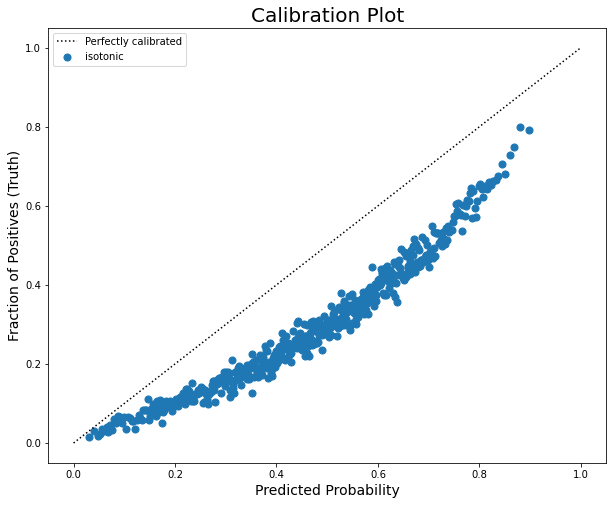

In [118]:
plot_distribution_predictions(y_proba_pred=isotonic['calibration'],y_true=isotonic['truth'],labels='isotonic',x_bins=500)

In [ ]:
xg = xgb.XGBClassifier(eta = 0.15,max_depth = 6,min_child_weight=4,gamma=1.6,colsample_bytree=0.9,subsample=0.6,reg_alpha=0.2,reg_lambda=1)
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_cali,y_train_cali = oversampler.fit_resample(X_train,y_train)
xg_calibration = CalibratedClassifierCV(xg, cv=5, method='sigmoid')
xg_calibration.fit(X_train_cali,y_train_cali)

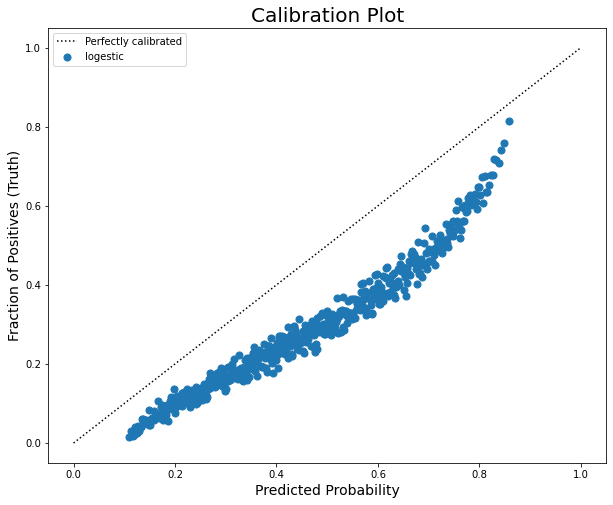

In [114]:
predicted_prob = xg_calibration.predict_proba(X_validation)[:,1]
logestic = pd.DataFrame(y_validation)
logestic.columns= ['truth']
logestic['calibration'] = predicted_prob
plot_distribution_predictions(y_proba_pred=logestic['calibration'],y_true=logestic['truth'],labels='logistic',x_bins=500)

we choose isotonic regression as our calibration method